In [ ]:
pip install node2vec

In [ ]:
def get_kmer_count_from_sequence(sequence, k=3, cyclic=True):
    """
    Returns dictionary with keys representing all possible kmers in a sequence
    and values counting their occurrence in the sequence.
    """
    # dict to store kmers
    kmers = {}


    # count how many times each occurred in this sequence (treated as cyclic)
    for i in range(0, len(sequence)):
        kmer = sequence[i:i + k]

        # for cyclic sequence get kmers that wrap from end to beginning
        length = len(kmer)
        if cyclic:
            if len(kmer) != k:
                kmer += sequence[:(k - length)]

        # if not cyclic then skip kmers at end of sequence
        else:
            if len(kmer) != k:
                continue

        # count occurrence of this kmer in sequence
        if kmer in kmers:
            kmers[kmer] += 1
        else:
            kmers[kmer] = 1

    return kmers

In [ ]:
def get_debruijn_edges_from_kmers(kmers):
    """
    Every possible (k-1)mer (n-1 suffix and prefix of kmers) is assigned
    to a node, and we connect one node to another if the (k-1)mer overlaps
    another. Nodes are (k-1)mers, edges are kmers.
    """
    # store edges as tuples in a set
    edges = set()

    # compare each (k-1)mer
    for k1 in kmers:
        for k2 in kmers:
            if k1 != k2:
                # if they overlap then add to edges
                if k1[1:] == k2[:-1]:
                    edges.add((k1[:-1], k2[:-1]))
                if k1[:-1] == k2[1:]:
                    edges.add((k2[:-1], k1[:-1]))

    return edges

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#testing with dna strand
dna = 'ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCACAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAA'
# not all possible kmers occur in this sequence, some occur multiple times.
dna_kmers = get_kmer_count_from_sequence(dna, k=4)


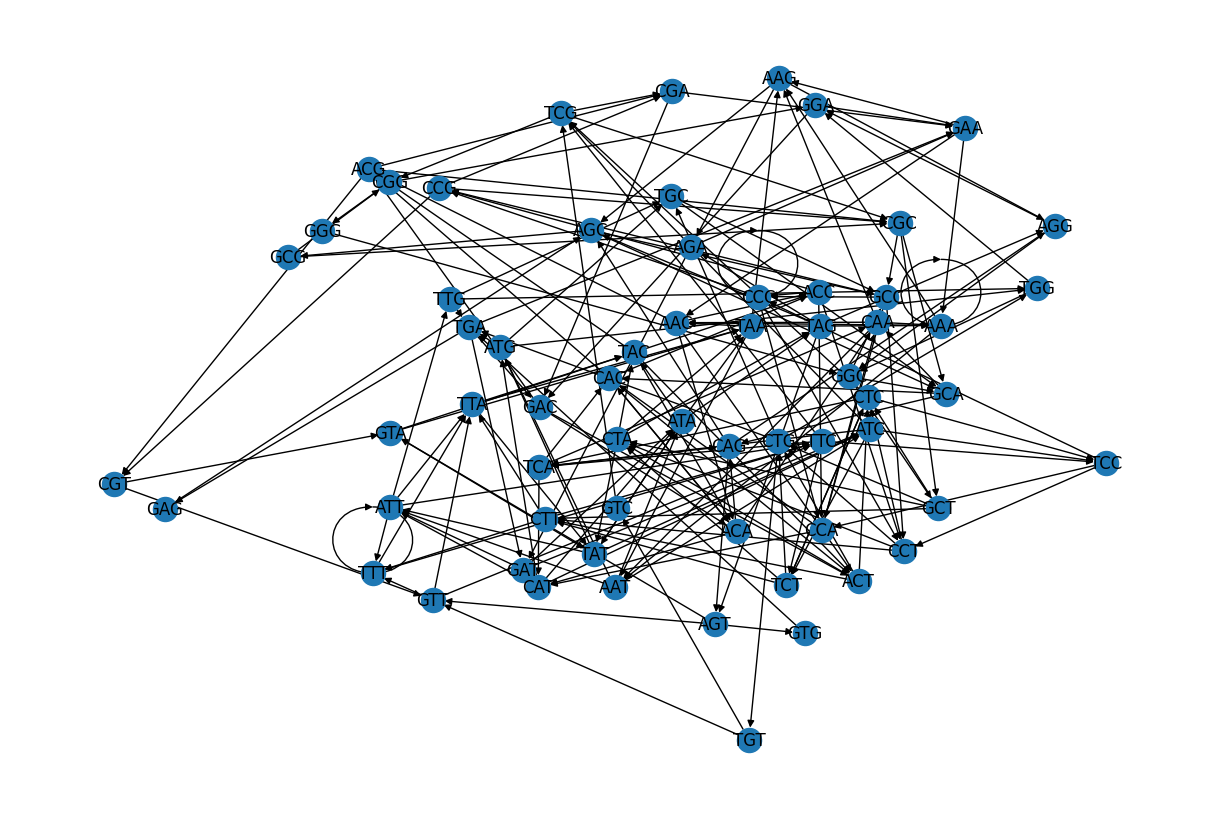

In [ ]:
dna_edges = get_debruijn_edges_from_kmers(dna_kmers)
dna_graph = nx.DiGraph()
dna_graph.add_edges_from(dna_edges)
plt.figure(figsize=(12, 8))
nx.draw(dna_graph,pos=nx.spring_layout(dna_graph),with_labels = True)


https://spotintelligence.com/2024/01/18/node2vec/

In [ ]:
from node2vec import Node2Vec
node2vec = Node2Vec(dna_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)


Computing transition probabilities:   0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)


In [ ]:
# Retrieve the embeddings for all nodes
embeddings = {node: model.wv[node] for node in dna_graph.nodes()}
embeddings


{'GCC': array([ 0.30385092, -0.396546  ,  0.09872724, -0.16635859, -0.06202002,
        -0.28731495, -0.06543946,  0.06364986,  0.03980824,  0.06920659,
         0.17188269, -0.16191271,  0.11206198, -0.03931363,  0.01929335,
         0.22892131,  0.20724495, -0.10322694, -0.11988456,  0.14619516,
         0.0871228 ,  0.07570398,  0.2567581 ,  0.09659491,  0.02766471,
         0.43150342, -0.2097602 ,  0.03675307, -0.09549423, -0.17332357,
        -0.24948825, -0.01673169,  0.03066183, -0.10884019, -0.05648203,
         0.07722596, -0.18917412,  0.01723447,  0.19497713, -0.07729225,
        -0.06554908, -0.04037165, -0.20948704, -0.17509677,  0.12257107,
        -0.04518065,  0.14069714,  0.05288764,  0.07788774, -0.07960521,
        -0.23378848, -0.22196874,  0.04153535,  0.21870464, -0.00248463,
         0.00314484, -0.0957633 ,  0.00950466, -0.2641923 ,  0.22116405,
        -0.20009647,  0.30812147, -0.1857524 ,  0.19665971], dtype=float32),
 'CCT': array([ 0.29451954,  0.12811427,

In [ ]:
print('length for TTA', len(embeddings['TTA']))
print(embeddings['TTA'])

length for TTA 64
[ 0.08938228  0.23065707  0.2445464   0.03734512 -0.17750761 -0.25118282
 -0.19868651  0.22403908  0.05220653 -0.14251366  0.14332068 -0.00847301
 -0.06103048 -0.2786426   0.22788638 -0.00325455  0.05933231 -0.23219442
  0.14241238  0.18235515  0.24330033 -0.05198067  0.28287485 -0.26756003
 -0.06131827  0.19897719 -0.18119635  0.16469477  0.01344489  0.09976004
 -0.08248087  0.2644682  -0.06256657  0.0165477  -0.01593428 -0.0403533
 -0.07177568  0.00220343  0.03371856  0.06881189  0.09962082  0.03544654
 -0.11131387 -0.10190797 -0.12211151 -0.19088157 -0.10835084  0.13470016
  0.03725413  0.23750587  0.26282597 -0.07552225  0.06465591  0.06706887
  0.33803836  0.32900533  0.05240526  0.0295449   0.26125145 -0.01102703
 -0.04493823 -0.02418197  0.30523467  0.2699785 ]


In [ ]:
#faltted data for NN & SVM input

arr = []
for node in embeddings:
  temp = 0
  for value in embeddings[node]:
    temp = temp + float(value)
  arr.append(temp)
print(arr)

[-0.21201915456913412, -0.07348965387791395, 0.664694108767435, 1.2451418321579695, 2.567935024620965, 2.4100993517786264, -0.08273268863558769, 2.1273084360873327, 0.8333356076327618, 1.222593140322715, 0.3978115157224238, 0.008142177888657898, -0.5587206591153517, 2.1978302160277963, 2.905468550452497, 0.47412890978739597, 0.8347992553608492, 0.41201103292405605, 3.047155875246972, 0.9552034111693501, 1.255300142802298, 1.302429397823289, -1.3363748172996566, -0.1349363792105578, 2.4386448906734586, 1.4065750546287745, 1.5161060192331206, 1.6034250864759088, 1.3075366225093603, 1.3057828422170132, -2.122205209452659, 0.5564086735248566, 0.20085998508147895, -0.16138399671763182, 0.6326498058624566, 1.9374969336786307, 1.2035247357562184, -1.0000066114589572, 0.4462181905983016, 1.254065920249559, 2.2298460262827575, 2.9634559135884047, -0.6486906541977078, 0.32834706734865904, -1.312981856521219, 0.6191087876795791, -1.4997780779376626, 1.717345061013475, -1.193199923262, 0.744506154